In [1]:
# import astropy
# from astropy.io import fits
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from itables import show
# import pprint

# import itertools
# from multiprocess import Pool
# import multiprocess
# from multiprocess import Manager
# from threading import Thread

# import os
# from tqdm import tqdm
# from tqdm.contrib.concurrent import process_map  # or thread_map
# import numpy as np
# from scipy.interpolate import interp1d
# # from scipy.optimize import UnivariateSpline
# from scipy.interpolate import interp1d, UnivariateSpline
# import matplotlib.pyplot as plt
# from astropy.io import fits
# from FitsClass import FITSFile as myfits
from ObservationClass import ObservationManager as obsm

import specs as specs

# Observation Class

## fits files organization

Given a folder with fits files, the class can look through all of them and classify them into their different stars, epoches taken and their corrsponding band.
It is also possible to set a backup folder, but it defaults to open 'Buckups' at the level of this notebook.

In [4]:
# First loading the obsm class
data_dir = './Data' # Default value
backup_dir = './Backups' # Default value
specs_filepath = '.specs.py' # Default value
obs = obsm(data_dir = data_dir, backup_dir = backup_dir, specs_filepath = specs_filepath)

# Now simply run this method:
fits_directory = '../Raw' # The folder with the fits fils
output_directory = None # where I want it to organize the files
obs.organize_star_files(fits_directory=fits_directory, output_directory=output_directory)

Star names found: ['Brey  70', 'Brey  83', 'HD  38029', 'HD  37248', 'Brey  95a', 'MNM2014 LMC195-1', 'HD  32125', 'HD  37026', 'HD 269818', 'HD  38448', 'HD  38030', 'HD  37680', 'Brey  58a', 'HD  32228', 'HD  32257', 'HD 269888', 'HD  36156', 'H2013 LMCe  584', 'L72 LH  41-1042', 'RMC 140', 'HD  32402', 'Brey  70a', 'Brey  16a', 'Brey  93', 'Brey  90a', 'HD 269891']
Found 0 FITS files in ../Raw
Organizing files for star: Brey  70
Found 0 FITS files for Brey  70
Organizing files for star: Brey  83
Found 0 FITS files for Brey  83
Organizing files for star: HD  38029
Found 0 FITS files for HD  38029
Organizing files for star: HD  37248
Found 0 FITS files for HD  37248
Organizing files for star: Brey  95a
Found 0 FITS files for Brey  95a
Organizing files for star: MNM2014 LMC195-1
Found 0 FITS files for MNM2014 LMC195-1
Organizing files for star: HD  32125
Found 0 FITS files for HD  32125
Organizing files for star: HD  37026
Found 0 FITS files for HD  37026
Organizing files for star: HD 

Now we can update the specs file like so

In [11]:
# Get the field we wanna add to specs
dict_obs = obs.get_observation_dict() # a dictionary which is essencially the paths to the fits files

# Now we choose the variable name and place the varible and it updates. 
# if it exists than a backup will be made under 'Backups' and the file will keep the old variable along with the new. 
# if not than it simply adds it
obs.update_specs_file('obs_file_names', dict_obs)
# obs.update_specs_file('variable_name', dict_obs)

Backup created: Backups/specs_58.bak
specs.py updated successfully.


## Creating a table which summarises the values inside fits files

It is possible to pass a list of stars, epochs and band if you dont wanna see all of their attributes.
The most imporant thing is passing a list of the attributes you wanna see.
The list of attributes available can be seen using a fits_file method which is shown down below.

In [14]:
stars = [star_names[0], star_names[15]]
bands = ['NIR','VIS']
attributes_list = ['OBJECT','DISPELEM','MJD-OBS','INSTRUME'] # Some exmaples
obs.create_observation_table_for_stars(stars=stars, band_list = bands, attributes_list= attributes_list)

,File Name,OBJECT,Band,MJD-OBS,INSTRUME
0,ADP.2020-11-13T13_19_45.726.fits,Brey 70,NIR,59150.345266,XSHOOTER
1,ADP.2020-11-13T13_19_45.412.fits,Brey 70,VIS,59150.345229,XSHOOTER
2,ADP.2020-12-07T08_55_14.173.fits,Brey 70,NIR,59170.209676,XSHOOTER
3,ADP.2020-12-07T08_55_14.279.fits,Brey 70,VIS,59170.209641,XSHOOTER
4,ADP.2021-09-01T08_13_28.027.fits,Brey 70,NIR,59448.337827,XSHOOTER
5,ADP.2021-09-01T08_13_27.907.fits,Brey 70,VIS,59448.337791,XSHOOTER
6,ADP.2021-09-20T19_54_27.938.fits,Brey 70,NIR,59461.391329,XSHOOTER
7,ADP.2021-09-20T19_54_27.925.fits,Brey 70,VIS,59461.391294,XSHOOTER
8,ADP.2021-11-05T09_31_37.324.fits,Brey 70,NIR,59510.271296,XSHOOTER
9,ADP.2021-11-05T09_31_37.515.fits,Brey 70,VIS,59510.271260,XSHOOTER


# Star Class 

Before doing various star related stuff, we need to open a star instance. 
It is done by using its name and from the obsm.

In [2]:
# All the star names are found in specs.py file
star_names = specs.star_names
print(star_names)

# To work on 'Brey 70' we load the first name
star_name = star_names[0]
print(f'We will work on star {star_name}')

# Loading is done using osm
obs = obsm()
star = obs.load_star_instance(star_name = star_name)

['Brey  70', 'Brey  83', 'HD  38029', 'HD  37248', 'Brey  95a', 'MNM2014 LMC195-1', 'HD  32125', 'HD  37026', 'HD 269818', 'HD  38448', 'HD  38030', 'HD  37680', 'Brey  58a', 'HD  32228', 'HD  32257', 'HD 269888', 'HD  36156', 'H2013 LMCe  584', 'L72 LH  41-1042', 'RMC 140', 'HD  32402', 'Brey  70a', 'Brey  16a', 'Brey  93', 'Brey  90a', 'HD 269891']
We will work on star Brey  70


## Exploring which data we have saved of each spectra

Every star has multiple epochs and bands within epoch, so when working a spesific observation we need to specify the epoch number and band.
To see all the avaiable epochs and bands of a star we can use the method that shows what properties we saved for the star:

In [3]:
star.list_available_properties()


Available properties for star 'Brey  70':

Epoch      Band       Property                                 Type       Details        
-----------------------------------------------------------------------------------------
1          .ipynb_checkpoints (No output directory)                                              
1          COMBINED   (No output directory)                                              
1          NIR        norm.npz                                 File                      
1          NIR        norm_anchors_results.npz                 File                      
1          UVB        Figures                                  Folder     2 files        
1          UVB        norm_anchors_results.npz                 File                      
1          VIS        norm_anchors_results.npz                 File                      
2          COMBINED   (No output directory)                                              
2          NIR        norm_anchors_results.npz  

## Loading a property

In [16]:
property_name = 'norm_anchors_results'
epoch_num = 1
band = 'NIR'
data = star.load_property(property_name= property_name,epoch_number=epoch_num, band = band)
print(data)

Tried ./Data/Brey  70/epoch1/NIR/output/norm_anchors_results.npz
{'selected_wavelengths': array([ 995.25, 1043.49, 1068.33, 1176.33, 1223.49, 1519.77, 1768.17,
       1984.89, 2034.93, 2216.01, 2370.81, 2468.01]), 'normalized_flux': array([0.        , 1.12963012, 0.65118962, ..., 0.4533152 , 0.23902796,
       0.        ]), 'interpolated_flux': array([8.35859047e-16, 8.35859047e-16, 8.35859047e-16, ...,
       5.04044773e-17, 5.04044773e-17, 5.04044773e-17])}


## Saving a property

In [19]:
epoch_num = 1
band = 'NIR'
random_num = 16
exmaple_data = star.test_method(epoch_num,band,random_num)
star.save_property(file_name='exmaple',property_data = exmaple_data, epoch_number = epoch_num, band = band,overwrite = True, backup = False)
# you can check that its now seen by doing star.list_available_properties() done earlier

TypeError: numpy.savez() argument after ** must be a mapping, not numpy.ndarray

## Deleting a property

In [ ]:
epoch_num = 1
band = 'NIR'
random_num = 16
exmaple_data = star.test_method(epoch_num,band,random_num)

# Notice that now we have delete_all_in_folder, if property is saved in a folder, cuz it has multiple saved files, we can turn it on and it will delete all
star.delete_files(property_to_delete=='exmaple', epoch_numbers = epoch_num, bands = band, delete_all=False, delete_all_in_folder = False)
# you can check that its now DELETED by using star.list_available_properties() done earlier

## Running methods while saving, overwriting, backing up, and choosing between multiprocess or iterations

## Getting the BAT99 name of the stars (requies interent since its being pulled from simabd) 

In [5]:
# obs = obsm()
for star_name in specs.star_names:
    star = obs.load_star_instance(star_name)
    print(f'{star_name} is BAT {star.BAT_ID}')

Brey  70 is BAT 87
Brey  83 is BAT 115
HD  38029 is BAT 85
HD  37248 is BAT 53
Brey  95a is BAT 127
MNM2014 LMC195-1 is BAT None
HD  32125 is BAT 9
HD  37026 is BAT 52
HD 269818 is BAT 70
HD  38448 is BAT 125
HD  38030 is BAT 84
HD  37680 is BAT 61
Brey  58a is BAT 69
HD  32228 is BAT 10
HD  32257 is BAT 8
HD 269888 is BAT 90
HD  36156 is BAT 34
H2013 LMCe  584 is BAT None
L72 LH  41-1042 is BAT None
RMC 140 is BAT 101
HD  32402 is BAT 11
Brey  70a is BAT 88
Brey  16a is BAT 20
Brey  93 is BAT 123
Brey  90a is BAT 121
HD 269891 is BAT 92


## Plotting a Stars spectra (1 or more badn adn 1 or more epochs)

### ploting spectra

Data/HD 269891/epoch1/NIR/ADP.2020-11-13T13_47_10.394.fits
Data loaded from Data/HD 269891/epoch1/NIR/ADP.2020-11-13T13_47_10.394.fits


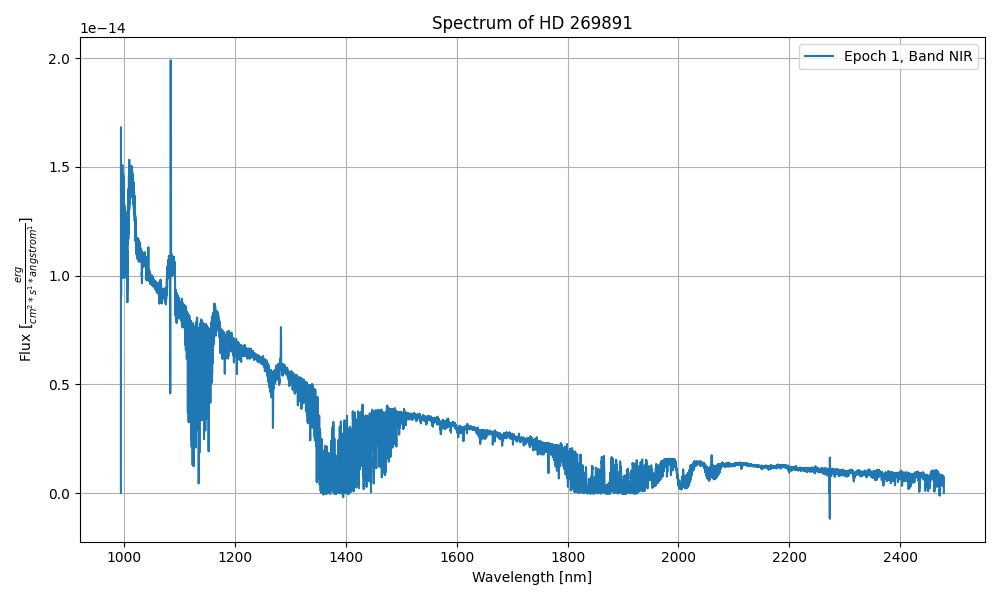

In [7]:
%matplotlib widget
# We can plot a single band from a single epoch and save it (though using the widget its simpler and better):
star.plot_spectra(epoch_nums=1, bands='NIR', save = False)

Data/HD 269891/epoch1/NIR/ADP.2020-11-13T13_47_10.394.fits
Data loaded from Data/HD 269891/epoch1/NIR/ADP.2020-11-13T13_47_10.394.fits
Data/HD 269891/epoch1/UVB/ADP.2020-11-13T13_47_10.402.fits
Data loaded from Data/HD 269891/epoch1/UVB/ADP.2020-11-13T13_47_10.402.fits
Data/HD 269891/epoch3/NIR/ADP.2021-01-11T12_13_26.016.fits
Data loaded from Data/HD 269891/epoch3/NIR/ADP.2021-01-11T12_13_26.016.fits
Data/HD 269891/epoch3/UVB/ADP.2021-01-11T12_13_25.991.fits
Data loaded from Data/HD 269891/epoch3/UVB/ADP.2021-01-11T12_13_25.991.fits
Data/HD 269891/epoch5/NIR/ADP.2021-09-01T08_13_27.890.fits
Data loaded from Data/HD 269891/epoch5/NIR/ADP.2021-09-01T08_13_27.890.fits
Data/HD 269891/epoch5/UVB/ADP.2021-09-01T08_13_28.052.fits
Data loaded from Data/HD 269891/epoch5/UVB/ADP.2021-09-01T08_13_28.052.fits


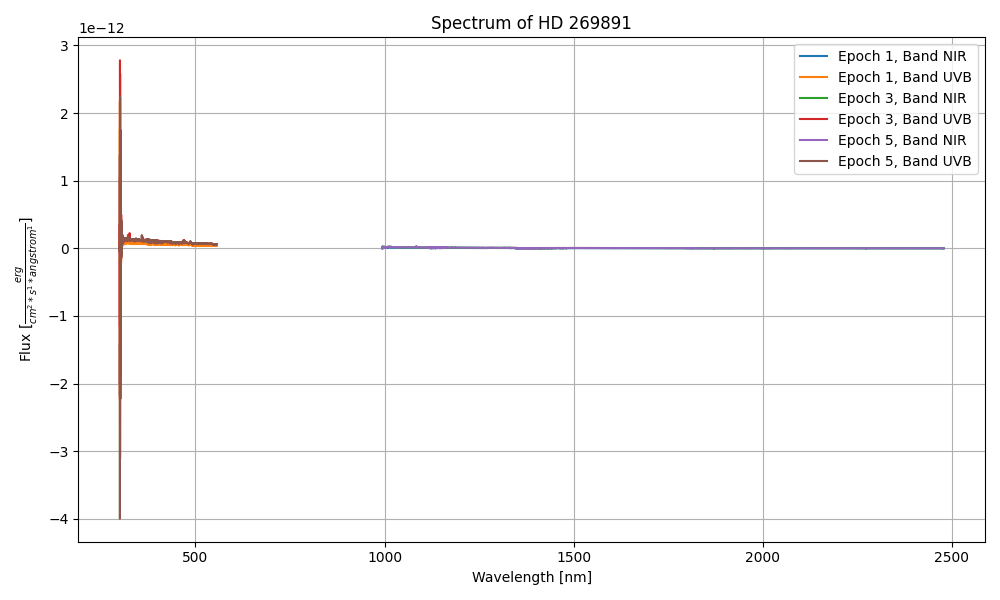

In [8]:
# We can also plot bands and epochs together by passing a list:
epochs = [1,3,5]
bands = ['NIR', 'UVB'] 
star.plot_spectra(epoch_nums = epochs, bands= bands)

### ploting normalized spectra (if available)

./Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Data loaded from ./Data/Brey  70/epoch1/UVB/ADP.2020-11-13T13_19_45.649.fits
Tried ./Data/Brey  70/epoch1/UVB/output/norm_anchors_results.npz


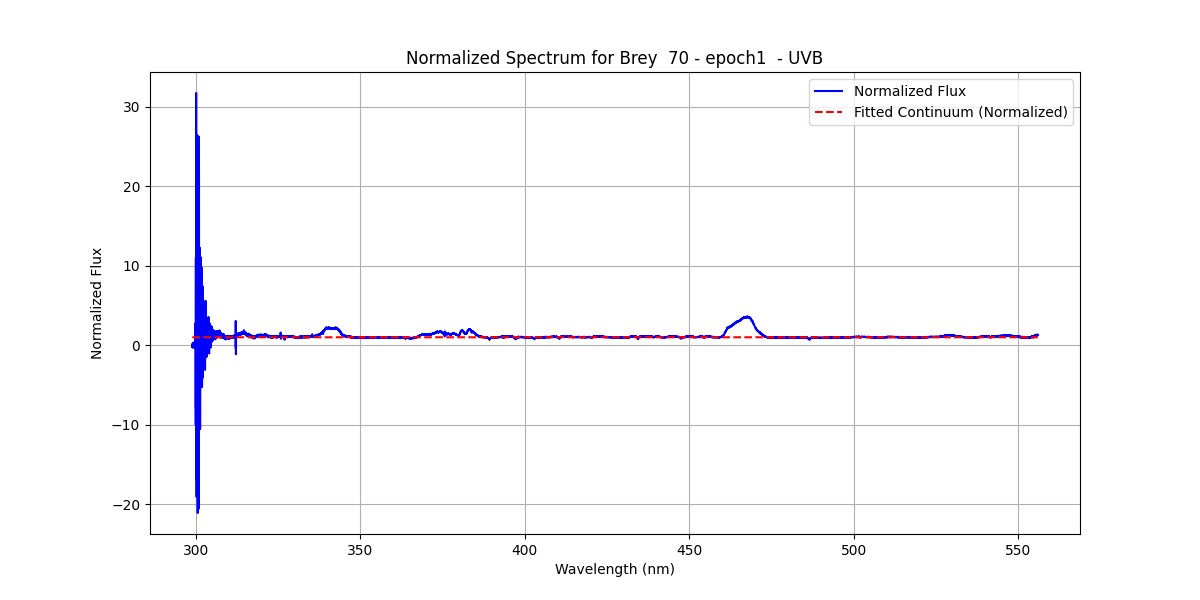

In [10]:
%matplotlib widget
epoch_num = 1
band = 'UVB'
star.plot_normalized_spectrum(epoch_num,band)

## Data extraction from a fits file

In [10]:
# A fits file has a lot of data in it. An easy way to see which data it has is loading a fits file and printing its fields.
# First lets load an observation (a single fits file) by specifing its epoch number and band
epoch_num = 2
band = 'VIS'
fits_file = star.load_observation(epoch_num,band)

# Now prints its values
fits_file.print_file_info()

Data/HD 269891/epoch2/VIS/ADP.2020-12-07T09_10_22.506.fits
Data loaded from Data/HD 269891/epoch2/VIS/ADP.2020-12-07T09_10_22.506.fits
Opened FITS file: Data/HD 269891/epoch2/VIS/ADP.2020-12-07T09_10_22.506.fits
Number of HDUs: 2
HDU 0: PrimaryHDU
------------------------------------------------------------
Header:
SIMPLE = True
BITPIX = 16
NAXIS = 0
EXTEND = True
COMMENT =   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT =   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
DATE = 2020-12-04T21:54:39
PRODCATG = SCIENCE.SPECTRUM
M_EPOCH = False
CONTNORM = False
FLUXERR = -2.0
REFERENC = 
PRODLVL = 2
ORIGIN = ESO
SPECSYS = TOPOCENT
PROCSOFT = xshoo/3.5.1
DISPELEM = VIS
PROG_ID = 105.207A.002
OBID1 = 2842728
OBSTECH = ECHELLE,SLIT,NODDING
FLUXCAL = ABSOLUTE
WAVELMIN = 533.66
WAVELMAX = 1020.0
SPEC_BIN = 0.02
OBJECT = HD 269891
RA = 84.455537
DEC = -69.08477
EXPTIME = 50.0
TEXPTIME = 50.0
MJD-OBS = 59179.345227906
MJD-END = 59179.3464805

In [11]:
# Now say wanna see the SNR of the file:
SNR = fits_file.data['SNR'][0] # For some weird reason the data is a list within a single item list (A 1XN matrix) so we take the first (and only) iten
print(SNR)

[ 0.          0.2402389   0.50928232 ...  8.44405574 10.48350455
  8.68299689]


## Combining NIR, VIS nd UVB of the fits files

In [ ]:
# We pass the epoch number we want to combine. if you want more you can either loop through the epoch numbers, 
# or use the star.execute_method in order to run in a list or even in parallel
epoch_num = 2 # only combines the bands in epoch 3 of the star
star.combine_fits_files(epoch_num=epoch_num)